In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg 
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
df = pd.read_csv("drive/My Drive/AIRGAS/Superstore2.csv")

In [5]:
df.columns = df.columns.str.replace(' ','_')

In [6]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [7]:
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"])

In [8]:
df = df.sort_values("Order_Date")

In [9]:
df["Day"] = df['Order_Date'].map(lambda x: x.day)
df["Month"] = df['Order_Date'].map(lambda x: x.month)
df["Year"] = df['Order_Date'].map(lambda x: x.year)

In [10]:
lbl = preprocessing.LabelEncoder()
df['Region'] = lbl.fit_transform(df['Region'].astype(str))
df['Product_ID'] = lbl.fit_transform(df['Product_ID'].astype(str))
df['Ship_Mode'] = lbl.fit_transform(df['Ship_Mode'].astype(str))
df['Customer_ID'] = lbl.fit_transform(df['Customer_ID'].astype(str))
df['Segment'] = lbl.fit_transform(df['Segment'].astype(str))
df['Country'] = lbl.fit_transform(df['Country'].astype(str))
df['City'] = lbl.fit_transform(df['City'].astype(str))
df['State'] = lbl.fit_transform(df['State'].astype(str))

In [11]:
def head_split(dataset, percentage):
  return dataset.head(int(len(dataset)*percentage))

In [12]:
def tail_split(dataset, percentage):
  return dataset.tail(int(len(dataset)*percentage))

In [13]:
df_train = head_split(df, .8)

In [14]:
df_test = tail_split(df, .2)

In [45]:
def create_features(df, label=None):
    df['Order_Date'] = df.index
    df['Month'] = df.Month
    df['Day'] = df.Day
    df['Year'] = df.Year
    df['Product_ID'] = df.Product_ID
    df['Region'] = df.Region
    df['Ship_Mode'] = df.Ship_Mode
    df['Segment'] = df.Segment
    df['Country'] = df.Country
    df['City'] = df.City
    df['State'] = df.State

    X = df[['Day','Month','Year','Product_ID','Region','Ship_Mode','Segment','Country','State']]
    if label:
        y = df[label]
        return X, y
    return X

In [46]:
X_train, y_train = create_features(df_train, label='Sales')
X_test, y_test = create_features(df_test, label='Sales')
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Day,Month,Year,Product_ID,Region,Ship_Mode,Segment,Country,State
7980,3,1,2014,1026,0,3,0,0,41
739,4,1,2014,987,0,3,2,0,11
740,4,1,2014,1378,0,3,2,0,11
741,4,1,2014,804,0,3,2,0,11
1759,5,1,2014,582,1,3,0,0,36
...,...,...,...,...,...,...,...,...,...
2439,17,7,2017,231,2,3,0,0,8
5650,17,7,2017,1381,3,2,1,0,3
5651,17,7,2017,22,3,2,1,0,3
4527,17,7,2017,310,1,3,2,0,30


In [31]:
reg = xg.XGBRegressor(n_estimators=1500)

In [32]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[15:41:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1500)

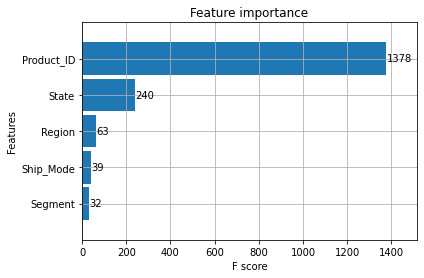

In [33]:
output = plot_importance(reg, height=0.9)

In [34]:
df_test['Sales_Prediction'] = reg.predict(X_test)
results = pd.concat([df_test, df_train], sort=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
results = results.reset_index()

In [36]:
results = results.drop("index", axis =1)

In [37]:
results = results.drop("Row_ID", axis =1)

In [38]:
results2 = results.iloc[:1998]

In [39]:
results

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Day,Month,Year,Sales_Prediction
0,US-2017-165358,7044,2017-07-23,3,720,Seth Vernon,0,0,374,36,...,Supplies,Acme Kleencut Forged Steel Scissors,9.184,2,0.20,1.1480,18,7,2017,120.165970
1,US-2017-142573,3918,2017-07-23,3,520,Maris LaWare,0,0,375,1,...,Chairs,High-Back Leather Manager's Chair,311.976,3,0.20,-42.8967,18,7,2017,511.568207
2,US-2017-165358,7043,2017-07-23,3,720,Seth Vernon,0,0,374,36,...,Chairs,"Situations Contoured Folding Chairs, 4/Set",198.744,4,0.30,-14.1960,18,7,2017,410.317230
3,US-2017-142573,3914,2017-07-23,3,520,Maris LaWare,0,0,375,1,...,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",801.600,5,0.50,-448.8960,18,7,2017,640.657593
4,US-2017-142573,3915,2017-07-23,3,520,Maris LaWare,0,0,375,1,...,Chairs,"Global Fabric Manager's Chair, Dark Gray",161.568,2,0.20,10.0980,18,7,2017,552.855835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2017-139948,2439,2017-07-22,3,727,Shaun Weien,0,0,473,8,...,Furnishings,"C-Line Magnetic Cubicle Keepers, Clear Polypro...",7.904,2,0.20,2.1736,17,7,2017,NaN
9989,CA-2017-142342,5650,2017-07-19,2,37,Anthony Johnson,1,0,14,3,...,Storage,Sterilite Show Offs Storage Containers,10.560,2,0.00,0.0000,17,7,2017,NaN
9990,CA-2017-142342,5651,2017-07-19,2,37,Anthony Johnson,1,0,14,3,...,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",1194.165,5,0.15,210.7350,17,7,2017,NaN
9991,US-2017-105046,4527,2017-07-23,3,75,Bill Eplett,2,0,416,30,...,Furnishings,DAX Solid Wood Frames,39.080,4,0.00,14.4596,17,7,2017,NaN


In [40]:
mean_squared_error(df_test.Sales,results2.Sales_Prediction)

160921.07901438067

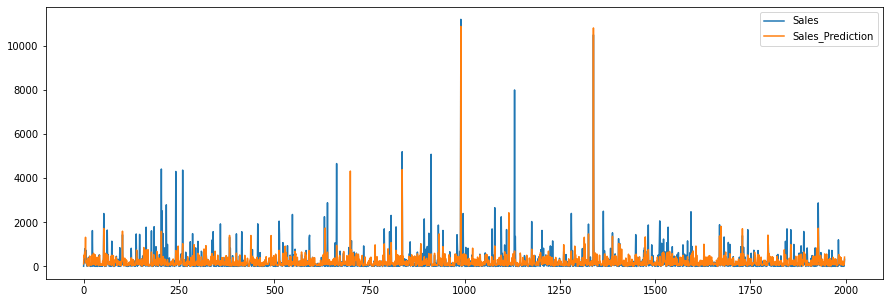

In [41]:
output = results2[['Sales','Sales_Prediction']].plot(figsize=(15, 5))